In [2]:
import pandas as pd
from pandas import DataFrame
from scipy.stats import zscore
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from matplotlib import pyplot
from itertools import combinations
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def get_models():
    models = dict()
    for d in range(1,4):
        trans = PolynomialFeatures(degree=d)
        model = xgb.XGBRegressor(verbosity=0)
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

def evaluate_model(model, X, Y):
    kfold = KFold(n_splits=num_instances, random_state=seed)
    n_scores = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    return n_scores
def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]

    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames

    # Remove interaction terms with all 0 values
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)

    return df

In [4]:
df = pd.read_csv(r'prepocessed_data.csv')
df.head()
X = df
Ydf = pd.read_excel('new_df_66.xlsx', engine='openpyxl')
Y = Ydf['DELTA30']

In [5]:
# Polynomial combination of features
poly = PolynomialFeatures(2)
data = poly.fit_transform(X)
dataset = DataFrame(data)
num_instances = 6
num_folds = 6
seed = 16
scoring = "neg_mean_absolute_error"
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    print(scores)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[-0.80898215 -1.10521964 -0.7521248  -1.05347224 -1.1785515  -1.21908069]
>1 -1.020 (0.178)


C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[-0.80967258 -1.13110624 -0.77430556 -1.09815762 -1.1140593  -1.17511189]
>2 -1.017 (0.161)


C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[-0.78580364 -1.22666509 -0.85155801 -1.0564881  -1.20220747 -1.30296141]
>3 -1.071 (0.194)


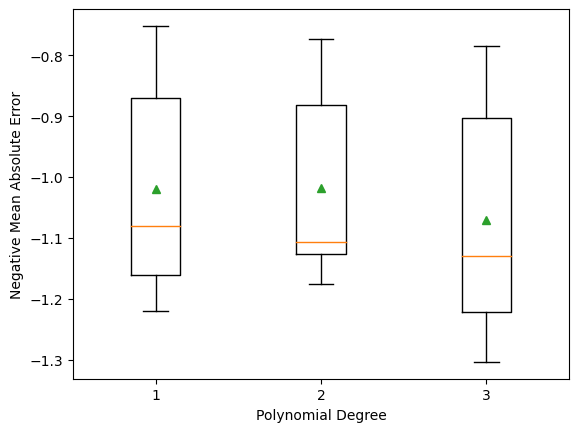

In [6]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xlabel('Polynomial Degree')
pyplot.ylabel('Negative Mean Absolute Error')
pyplot.savefig("Box-poly_145.jpg")
pyplot.show()

In [7]:
X
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 4)]
for d in degress:
	# create transform
	trans = PolynomialFeatures(degree=d)
	# fit and transform
	data = trans.fit_transform(X)
	# record number of features
	num_features.append(data.shape[1])
	# summarize
	print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features


Degree: 1, Features: 144
Degree: 2, Features: 10440
Degree: 3, Features: 508080


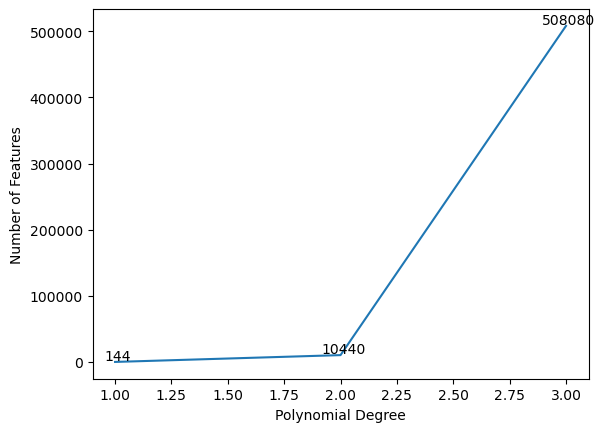

In [8]:
z = [1, 2, 3]
pyplot.plot(degress, num_features)
pyplot.xlabel('Polynomial Degree')
pyplot.ylabel('Number of Features')
for i, txt in enumerate(num_features):
    pyplot.annotate(txt, (z[i], num_features[i]), textcoords="offset pixels", # how to position the text
                 xytext=(3,2), # distance from text to points (x,y)
                 ha='center')
pyplot.savefig("Number_Of_Features_145.jpg")
pyplot.show()

In [9]:
new_df = add_interactions(X)
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)
data = pd.DataFrame(new_df_scaled, columns=new_df.columns)

In [10]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
#
X = data
Y = Ydf['DELTA30']


C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)


#fit all models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# models = pd.DataFrame(models)
#

100%|██████████| 42/42 [04:22<00:00,  6.26s/it]


In [12]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,75268926437034067729842176.00,-12424228921880751707598618624.00,171299169605921.38,0.66
SGDRegressor,183378278726720620068864.00,-30269246846600946753994752.00,8455150508104.25,0.32
MLPRegressor,1.01,-0.58,1.93,4.30
KernelRidge,1.01,-0.50,1.88,0.25
OrthogonalMatchingPursuit,1.01,-0.45,1.85,0.38
GaussianProcessRegressor,1.01,-0.23,1.70,1.02
PassiveAggressiveRegressor,1.01,-0.16,1.66,0.98
LinearSVR,1.01,-0.13,1.64,1.30
BayesianRidge,1.01,-0.13,1.64,1.19


In [13]:
poly_df = pd.concat([X, Y], axis=1)
poly_df.to_csv('poly_df.csv', header=True, index=False)

In [17]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
model = xgb.XGBRegressor(verbosity=0)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
predictions
results = model.evals_result()
epoch = len(results['validation_0']['mae'])

[0]	validation_0-mae:0.84252	validation_0-rmse:1.11233	validation_1-mae:1.21724	validation_1-rmse:1.59178
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-mae:0.62270	validation_0-rmse:0.84222	validation_1-mae:1.12407	validation_1-rmse:1.49461
[2]	validation_0-mae:0.48081	validation_0-rmse:0.65198	validation_1-mae:1.10278	validation_1-rmse:1.46693
[3]	validation_0-mae:0.35808	validation_0-rmse:0.49921	validation_1-mae:1.09322	validation_1-rmse:1.44881
[4]	validation_0-mae:0.27453	validation_0-rmse:0.39078	validation_1-mae:1.07246	validation_1-rmse:1.42168
[5]	validation_0-mae:0.21358	validation_0-rmse:0.30775	validation_1-mae:1.05018	validation_1-rmse:1.39750
[6]	validation_0-mae:0.16500	validation_0-rmse:0.24330	validation_1-mae:1.04728	validation_1-rmse:1.39770
[7]	validation_0-mae:0.12776	validation_0-rmse:0.19252	validation_1-mae:1.05109	validation_1-rmse:1

In [18]:
epoch


26

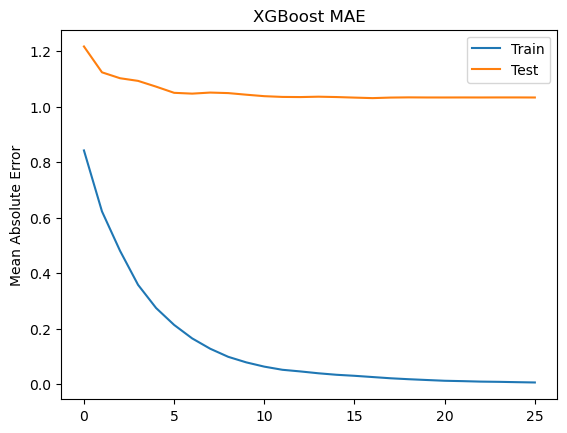

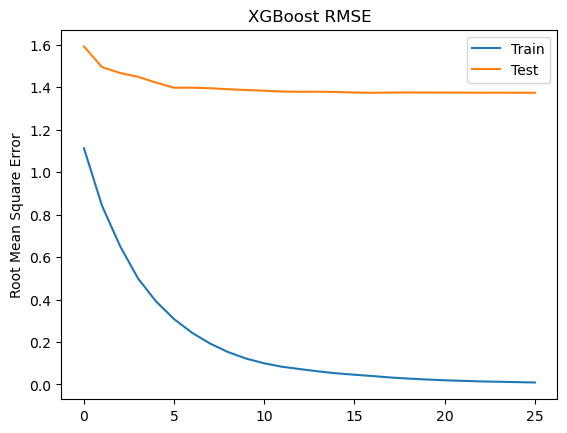

In [19]:
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('XGBoost MAE')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('XGBoost RMSE')
pyplot.show()